# Bias Mitigation Analysis - Adult

In [1]:
data_name = 'Adult'

In [2]:
from analysis_utils import *
%matplotlib inline

In [3]:
# define desired metric for the use case
ACC_METRIC = 'avg_norm_mcc_score'
FAIR_METRIC = 'abs_avg_spd_score'

In [4]:
import os
import pandas as pd
import numpy as np
results_all = pd.DataFrame()
dir_path = './{}_results/'.format(data_name)
for file in os.listdir(dir_path):
    print(file)
    result = pd.read_pickle(dir_path+file)
    results_all = pd.concat([results_all, result])

Adult_results_GB
Adult_results_LR
Adult_results_NB
Adult_results_RF
Adult_results_SVM_CEO
Adult_results_SVM_EGR
Adult_results_SVM_EGR2
Adult_results_SVM_EGR3
Adult_results_SVM_EGR4
Adult_results_SVM_LFR_pre
Adult_results_SVM_LFR_pre2
Adult_results_SVM_None
Adult_results_SVM_ROC
Adult_results_SVM_RW
Adult_results_SVM_RWCEO
Adult_results_SVM_RWROC
Adult_results_TabTrans_CEO
Adult_results_TabTrans_None
Adult_results_TabTrans_ROC
Adult_results_TabTrans_RW
Adult_results_TabTrans_RW+CEO
Adult_results_TabTrans_RW+ROC


In [5]:
print(results_all.shape)
results_all.head(2)

(960, 19)


,base_estimator,param,Bias_Mitigation,threshold,avg_acc_score,avg_bacc_score,avg_f1_score,avg_auc_score,avg_mcc_score,avg_norm_mcc_score,avg_spd_score,avg_aod_score,avg_eod_score,avg_ford_score,avg_ppvd_score,avg_(1-consistency_score),avg_gei_score,avg_ti_score,cost
0,GB,"{'criterion': 'friedman_mse', 'max_depth': 8, ...",None,0.3,0.840033,0.817658,0.699629,0.91493,0.597631,0.798816,-0.156108,-0.048603,-0.017333,-0.047716,-0.037404,0.091429,0.071037,0.089125,0.357292
1,GB,"{'criterion': 'friedman_mse', 'max_depth': 8, ...",None,0.4,0.861649,0.766735,0.670009,0.91493,0.595307,0.797653,-0.111688,-0.060030,-0.086232,-0.063600,-0.013980,0.066148,0.076411,0.120370,0.314035


In [6]:
import seaborn as sns
accuracy_metrics = ['acc_score', 'bacc_score', 'f1_score', 'auc_score', 'mcc_score','norm_mcc_score']
group_fairness = ['spd_score', 'aod_score', 'eod_score','ford_score','ppvd_score']
individual_fairness = ['(1-consistency_score)','gei_score','ti_score']
fairness_metrics = group_fairness+individual_fairness
avg_accuracy_metrics = ['avg_'+col for col in accuracy_metrics]
avg_fairness_metrics = ['avg_'+col for col in fairness_metrics]
avg_group_fairness_metrics = ['avg_'+col for col in group_fairness]

In [7]:
results_all_converted = results_all.copy(deep=True).reset_index(drop=True)
for col in avg_fairness_metrics:
    abs_col_name = 'abs_'+col
    results_all_converted[abs_col_name] = results_all_converted[col].abs()
# round threshold since 0.4 was 0.399999999 
results_all_converted.threshold = round(results_all_converted.threshold,2)
# base estimator invariant in-processing methods shouldn't have any parameter value
results_all_converted.loc[results_all_converted.Bias_Mitigation.isin(['AD','LFR_in']),['param']] = ''

In [8]:
base_invariant = results_all_converted.loc[results_all_converted.Bias_Mitigation.isin(['AD','LFR_in'])]
for base in results_all_converted.base_estimator.unique():
    if results_all_converted[(results_all_converted.base_estimator==base)\
                             &((results_all_converted.Bias_Mitigation=='AD')|(results_all_converted.Bias_Mitigation=='LFR_in'))].shape[0]==0:
        dup = base_invariant.copy()
        dup['base_estimator'] = dup['base_estimator'].replace({'LR':base})
        results_all_converted = pd.concat([results_all_converted, dup])
results_all_converted.head()

,base_estimator,param,Bias_Mitigation,threshold,avg_acc_score,avg_bacc_score,avg_f1_score,avg_auc_score,avg_mcc_score,avg_norm_mcc_score,...,avg_ti_score,cost,abs_avg_spd_score,abs_avg_aod_score,abs_avg_eod_score,abs_avg_ford_score,abs_avg_ppvd_score,abs_avg_(1-consistency_score),abs_avg_gei_score,abs_avg_ti_score
0,GB,"{'criterion': 'friedman_mse', 'max_depth': 8, ...",None,0.3,0.840033,0.817658,0.699629,0.91493,0.597631,0.798816,...,0.089125,0.357292,0.156108,0.048603,0.017333,0.047716,0.037404,0.091429,0.071037,0.089125
1,GB,"{'criterion': 'friedman_mse', 'max_depth': 8, ...",None,0.4,0.861649,0.766735,0.670009,0.91493,0.595307,0.797653,...,0.120370,0.314035,0.111688,0.060030,0.086232,0.063600,0.013980,0.066148,0.076411,0.120370
2,GB,"{'criterion': 'friedman_mse', 'max_depth': 8, ...",None,0.5,0.856977,0.728741,0.618276,0.91493,0.573705,0.786852,...,0.140898,0.296847,0.083699,0.039594,0.062505,0.078297,0.002760,0.061059,0.082465,0.140898
3,GB,"{'criterion': 'friedman_mse', 'max_depth': 8, ...",None,0.6,0.823562,0.634400,0.423692,0.91493,0.463600,0.731800,...,0.193530,0.304314,0.036113,0.002426,0.006041,0.108891,0.012518,0.048761,0.107125,0.193530
4,GB,"{'criterion': 'friedman_mse', 'max_depth': 8, ...",None,0.7,0.818740,0.623855,0.397092,0.91493,0.445202,0.722601,...,0.199671,0.309474,0.032075,0.005548,0.011738,0.111750,0.007454,0.046500,0.110700,0.199671


In [9]:
results_all_converted.base_estimator.value_counts()

GB          200
LR          200
NB          200
RF          200
SVM         200
TabTrans    160
Name: base_estimator, dtype: int64

In [10]:
# BEST MODELS
scoring = (ACC_METRIC,FAIR_METRIC,1,1)
w_acc = scoring[2]
w_fair = scoring[3]
acc_cost = 1-results_all_converted[ACC_METRIC]
fair_cost = abs(results_all_converted[FAIR_METRIC])

results_all_converted['cost'] = w_acc*acc_cost + w_fair*fair_cost
best_models = results_all_converted.sort_values(by='cost')[['base_estimator','param','Bias_Mitigation','threshold',
                                                            ACC_METRIC,FAIR_METRIC,'cost']].drop_duplicates(subset='cost').head(10)
best_models.rename({ACC_METRIC: 'Norm. MCC',
                    FAIR_METRIC: 'Abs. '+FAIR_METRIC.removeprefix('abs_').removeprefix('avg_').removesuffix('_score').upper()}, axis=1, inplace=True)
best_models.columns = [col if best_models.columns.get_loc(col) in [4,5]\
                       else col.replace('_',' ').title() for col in best_models.columns] 
f = {best_models.columns[i]:'{:.4f}' for i in range(-3,0)}
f.update({'Threshold':'{:.1f}'})
styled_best_models = best_models.style.format(f).hide(axis="index")
print(styled_best_models.to_latex(hrules=True, label="table:results_{}".format(data_name),
                                  caption="Top 5 Models for {}".format(data_name)).replace('_','\_'))
display(styled_best_models)

\begin{table}
\caption{Top 5 Models for Adult}
\label{table:results\_Adult}
\begin{tabular}{lllrrrr}
\toprule
Base Estimator & Param & Bias Mitigation & Threshold & Norm. MCC & Abs. SPD & Cost \\
\midrule
GB & {'criterion': 'friedman\_mse', 'max\_depth': 8, 'n\_estimators': 50} & RW+ROC & 0.4 & 0.8108 & 0.0088 & 0.1980 \\
GB & {'criterion': 'friedman\_mse', 'max\_depth': 8, 'n\_estimators': 50} & RW+ROC & 0.5 & 0.8028 & 0.0053 & 0.2024 \\
RF & {'criterion': 'entropy', 'max\_depth': 16, 'n\_estimators': 50} & ROC & 0.3 & 0.7995 & 0.0040 & 0.2046 \\
GB & {'criterion': 'friedman\_mse', 'max\_depth': 8, 'n\_estimators': 50} & RW+ROC & 0.3 & 0.8141 & 0.0198 & 0.2057 \\
RF & {'criterion': 'gini', 'max\_depth': 16, 'n\_estimators': 50} & ROC & 0.3 & 0.8007 & 0.0065 & 0.2058 \\
RF & {'criterion': 'entropy', 'max\_depth': 16, 'n\_estimators': 10} & ROC & 0.3 & 0.7955 & 0.0078 & 0.2124 \\
GB & {'criterion': 'friedman\_mse', 'max\_depth': 8, 'n\_estimators': 50} & RW+ROC & 0.6 & 0.7858 & 0.0020 &

Base Estimator,Param,Bias Mitigation,Threshold,Norm. MCC,Abs. SPD,Cost
GB,"{'criterion': 'friedman_mse', 'max_depth': 8, 'n_estimators': 50}",RW+ROC,0.4,0.8108,0.0088,0.1980
GB,"{'criterion': 'friedman_mse', 'max_depth': 8, 'n_estimators': 50}",RW+ROC,0.5,0.8028,0.0053,0.2024
RF,"{'criterion': 'entropy', 'max_depth': 16, 'n_estimators': 50}",ROC,0.3,0.7995,0.0040,0.2046
GB,"{'criterion': 'friedman_mse', 'max_depth': 8, 'n_estimators': 50}",RW+ROC,0.3,0.8141,0.0198,0.2057
RF,"{'criterion': 'gini', 'max_depth': 16, 'n_estimators': 50}",ROC,0.3,0.8007,0.0065,0.2058
RF,"{'criterion': 'entropy', 'max_depth': 16, 'n_estimators': 10}",ROC,0.3,0.7955,0.0078,0.2124
GB,"{'criterion': 'friedman_mse', 'max_depth': 8, 'n_estimators': 50}",RW+ROC,0.6,0.7858,0.0020,0.2162
RF,"{'criterion': 'gini', 'max_depth': 16, 'n_estimators': 10}",RW+ROC,0.4,0.7899,0.0075,0.2176
RF,"{'criterion': 'gini', 'max_depth': 16, 'n_estimators': 10}",ROC,0.3,0.7953,0.0131,0.2178
RF,"{'criterion': 'gini', 'max_depth': 16, 'n_estimators': 50}",RW+ROC,0.4,0.7930,0.0108,0.2178


In [11]:
abs_avg_fairness_metrics = ['abs_'+ele for ele in avg_fairness_metrics]

## Analysis like in Chen et al. (2023)

In [12]:
diff_dict = {}
for base in results_all_converted.base_estimator.unique():
    None_table = results_all_converted[(results_all_converted.base_estimator==base)&
                                       (results_all_converted.Bias_Mitigation=='None')].reset_index(drop=True)
    diff_dict[base] = {}
    for BM in results_all_converted[results_all_converted.base_estimator==base].Bias_Mitigation.unique():
        if BM == 'None': pass
        else: 
            # print(BM)
            BM_subtable = results_all_converted[(results_all_converted.base_estimator==base)&
                                                (results_all_converted.Bias_Mitigation==BM)].reset_index(drop=True)
            diff_table = BM_subtable.iloc[:,:4]
            diff_table = pd.concat([diff_table,BM_subtable.iloc[:,4:].subtract(None_table.iloc[:,4:])], axis=1)
            diff_dict[base][BM] = diff_table

In [13]:
df = pd.DataFrame()
for base in diff_dict.keys():
    sub_df = pd.concat(diff_dict[base])
    df = pd.concat([df, pd.concat(diff_dict[base])])
df

base_estimator                                              param  \
RW 0              GB  {'criterion': 'friedman_mse', 'max_depth': 8, ...   
   1              GB  {'criterion': 'friedman_mse', 'max_depth': 8, ...   
   2              GB  {'criterion': 'friedman_mse', 'max_depth': 8, ...   
   3              GB  {'criterion': 'friedman_mse', 'max_depth': 8, ...   
   4              GB  {'criterion': 'friedman_mse', 'max_depth': 8, ...   
...              ...                                                ...   
AD 15       TabTrans                                                      
   16       TabTrans                                                      
   17       TabTrans                                                      
   18       TabTrans                                                      
   19       TabTrans                                                      

      Bias_Mitigation  threshold  avg_acc_score  avg_bacc_score  avg_f1_score  \
RW 0               RW        0.3      -0.002002       -0.001410     -0.002709   
   1               RW        0.4       0.000237        0.000982      0.001242   
   2               RW        0.5      -0.000667       -0.001234     -0.002326   
   3               RW        0.6       0.000129        0.000298      0.000749   
   4               RW        0.7      -0.001033       -0.002148     -0.005466   
...               ...        ...            ...             ...           ...   
AD 15              AD        0.3       0.138029        0.022663      0.085141   
   16              AD        0.4       0.082976       -0.023488      0.026447   
   17              AD        0.5       0.031110       -0.055249     -0.042526   
   18              AD        0.6       0.002992       -0.073456     -0.101660   
   19              AD        0.7      -0.014146       -0.077921     -0.141467   

       avg_auc_score  avg_mcc_score  avg_norm_mcc_score  ...  avg_ti_score  \
RW 0       -0.000675      -0.003677           -0.001839  ...      0.000512   
   1       -0.000675       0.000946            0.000473  ...     -0.000528   
   2       -0.000675      -0.002236           -0.001118  ...      0.000688   
   3       -0.000675       0.000460            0.000230  ...     -0.000173   
   4       -0.000675      -0.004111           -0.002056  ...      0.001260   
...              ...            ...                 ...  ...           ...   
AD 15       0.021707       0.103733            0.051866  ...      0.024667   
   16       0.021707       0.056385            0.028193  ...      0.031390   
   17       0.021707       0.002840            0.001420  ...      0.036346   
   18       0.021707      -0.037485           -0.018742  ...      0.042378   
   19       0.021707      -0.066870           -0.033435  ...      0.043774   

           cost  abs_avg_spd_score  abs_avg_aod_score  abs_avg_eod_score  \
RW 0  -0.035467          -0.037305          -0.044968           0.037756   
   1  -0.037297          -0.036824          -0.039320          -0.033130   
   2  -0.003675          -0.004793          -0.011560          -0.021076   
   3  -0.000522          -0.000292           0.000692           0.001140   
   4   0.002131           0.000076          -0.002670          -0.005339   
...         ...                ...                ...                ...   
AD 15 -0.172533          -0.120667          -0.056187           0.065575   
   16 -0.181119          -0.152926          -0.002674           0.102413   
   17 -0.157730          -0.156310           0.056089           0.169788   
   18 -0.092472          -0.111215           0.093387           0.210935   
   19 -0.035675          -0.069110           0.116829           0.235095   

       abs_avg_ford_score  abs_avg_ppvd_score  abs_avg_(1-consistency_score)  \
RW 0             0.009716            0.070365                       0.001318   
   1             0.016954            0.092457                       0.001740   
   2             0.002799            0.019

In [14]:
(df.iloc[:,4:10]>0).sum()/df.shape[0]

avg_acc_score         0.347115
avg_bacc_score        0.161538
avg_f1_score          0.175962
avg_auc_score         0.141346
avg_mcc_score         0.211538
avg_norm_mcc_score    0.211538
dtype: float64

In [15]:
(df[df.Bias_Mitigation=='RW'].avg_norm_mcc_score>0).value_counts(normalize=True)

False    0.608333
True     0.391667
Name: avg_norm_mcc_score, dtype: float64

### Accuracy Behavior After Bias Mitigations

,avg_acc_score,avg_bacc_score,avg_f1_score,avg_auc_score,avg_mcc_score,avg_norm_mcc_score
noorincrease,41,40,37,22,33,33
small,0,0,0,1,3,3
medium,1,1,4,3,3,3
large,10,11,11,26,13,13


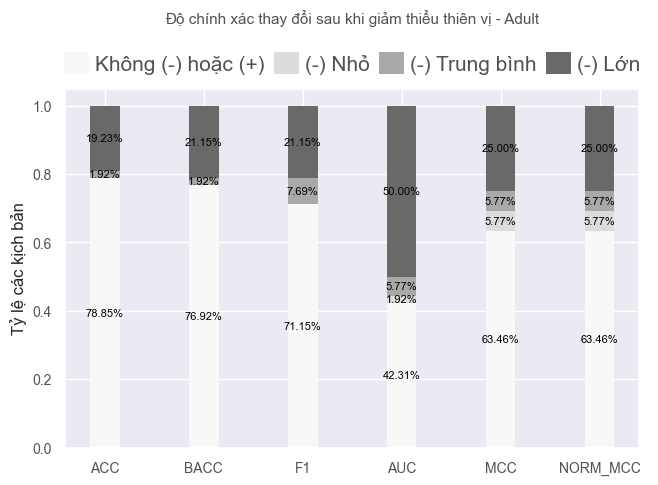

In [16]:
diff_degree = behaviour_analysis(data=results_all_converted, metric_list=avg_accuracy_metrics)
display(pd.DataFrame(diff_degree))
plot_behaviour_analysis(diff_degree, data_name, caption='Độ chính xác thay đổi sau khi giảm thiểu thiên vị - {}', figsize=(8, 6))

### Accuracy Behavior After Bias Mitigations per BM

,RW,LFR_pre,EGR,ROC,CEO,RW+ROC,RW+CEO,LFR_in,AD
noorincrease,6,0,5,6,4,4,4,0,4
small,0,0,0,0,2,0,1,0,0
medium,0,0,0,0,0,1,1,0,1
large,0,5,0,0,0,1,0,6,1


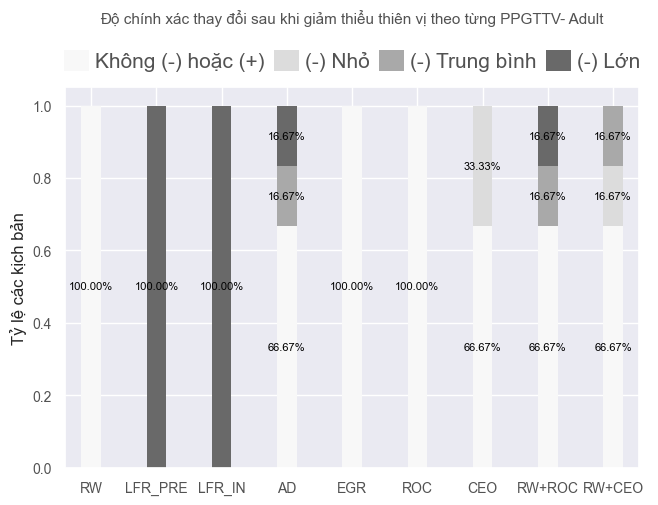

In [17]:
diff_degree = behaviour_analysis(data=results_all_converted, metric_list=[ACC_METRIC], category='bm')
display(pd.DataFrame(diff_degree))
plot_behaviour_analysis(diff_degree, data_name, category='bm', 
                        caption='Độ chính xác thay đổi sau khi giảm thiểu thiên vị theo từng PPGTTV- {}', figsize=(8, 6))

In [18]:
# diff_degree, table = behaviour_analysis(data=results_all_converted, metric_list=avg_accuracy_metrics, category='bm')
# plot_behaviour_analysis(table, data_name, category='bm', caption='Accuracy Change after applying Bias Mitigations per BM ({})', figsize=(12, 6))

### Accuracy Behavior After Bias Mitigations per base

,GB,LR,NB,RF,SVM,TabTrans
noorincrease,7,3,7,3,7,6
small,0,1,0,2,0,0
medium,0,2,0,1,0,0
large,2,3,2,3,2,1


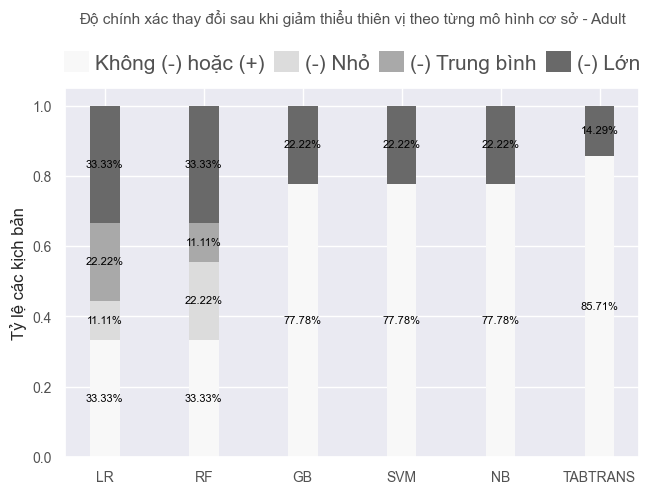

In [19]:
diff_degree = behaviour_analysis(data=results_all_converted, metric_list=[ACC_METRIC], category='base')
display(pd.DataFrame(diff_degree))
plot_behaviour_analysis(diff_degree, data_name, category='base', 
                        caption='Độ chính xác thay đổi sau khi giảm thiểu thiên vị theo từng mô hình cơ sở - {}', figsize=(8, 6))

In [20]:
# diff_degree, table = behaviour_analysis(data=results_all_converted, metric_list=avg_accuracy_metrics, category='base')
# plot_behaviour_analysis(table, data_name, category='base', caption='Accuracy Change after applying Bias Mitigations per Base ({})', figsize=(12, 6))

### Fairness Behavior After Bias Mitigations

,abs_avg_spd_score,abs_avg_aod_score,abs_avg_eod_score,abs_avg_ford_score,abs_avg_ppvd_score,abs_avg_(1-consistency_score),abs_avg_gei_score,abs_avg_ti_score
noorincrease,17,27,30,42,47,43,52,52
small,0,0,0,0,1,0,0,0
medium,0,0,0,0,0,0,0,0
large,35,25,22,10,4,9,0,0


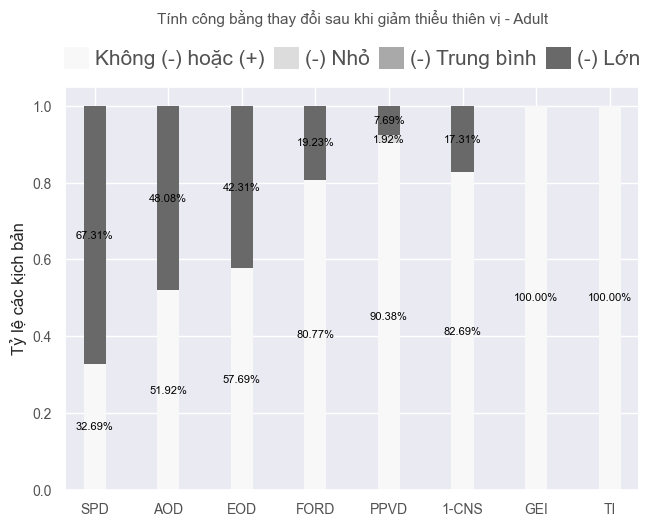

In [21]:
abs_avg_fairness_metrics = ['abs_'+ele for ele in avg_fairness_metrics]
diff_degree = behaviour_analysis(data=results_all_converted, metric_list=abs_avg_fairness_metrics)
display(pd.DataFrame(diff_degree))
plot_behaviour_analysis(diff_degree, data_name, caption='Tính công bằng thay đổi sau khi giảm thiểu thiên vị - {}', figsize=(8, 6))

### Fairness Behavior After Bias Mitigations per BM

,RW,LFR_pre,EGR,ROC,CEO,RW+ROC,RW+CEO,LFR_in,AD
noorincrease,3,0,2,1,6,0,5,0,0
small,0,0,0,0,0,0,0,0,0
medium,0,0,0,0,0,0,0,0,0
large,3,5,3,5,0,6,1,6,6


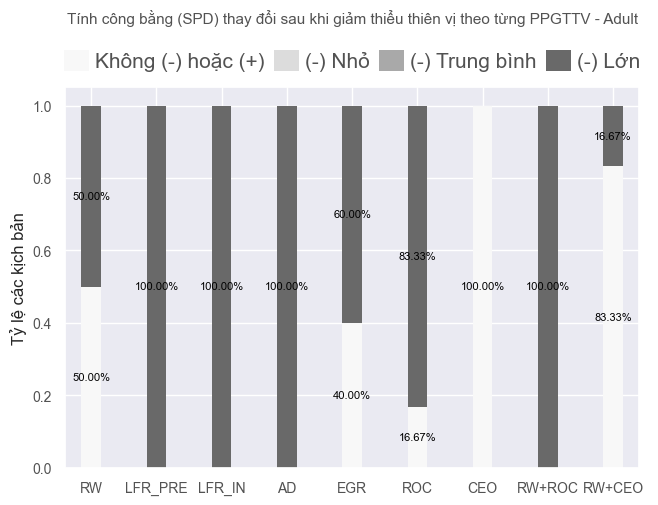

In [22]:
abs_avg_fairness_metrics = ['abs_'+ele for ele in avg_fairness_metrics]
diff_degree = behaviour_analysis(data=results_all_converted, metric_list=[FAIR_METRIC], category='bm')
display(pd.DataFrame(diff_degree))
plot_behaviour_analysis(diff_degree, data_name, category='bm', 
                        caption='Tính công bằng (%s) thay đổi sau khi giảm thiểu thiên vị theo từng PPGTTV - {}'%(FAIR_METRIC.split('_')[2].upper()),
                        figsize=(8, 6))

In [23]:
# abs_avg_fairness_metrics = ['abs_'+ele for ele in avg_fairness_metrics]
# diff_degree, table = behaviour_analysis(data=results_all_converted, metric_list=abs_avg_fairness_metrics, category='bm')
# plot_behaviour_analysis(table, data_name, category='bm', caption='Fairness Change after applying Bias Mitigations per BM ({})', figsize=(12, 6))

### Fairness Behavior After Bias Mitigations per base

,GB,LR,NB,RF,SVM,TabTrans
noorincrease,4,2,2,4,2,3
small,0,0,0,0,0,0
medium,0,0,0,0,0,0
large,5,7,7,5,7,4


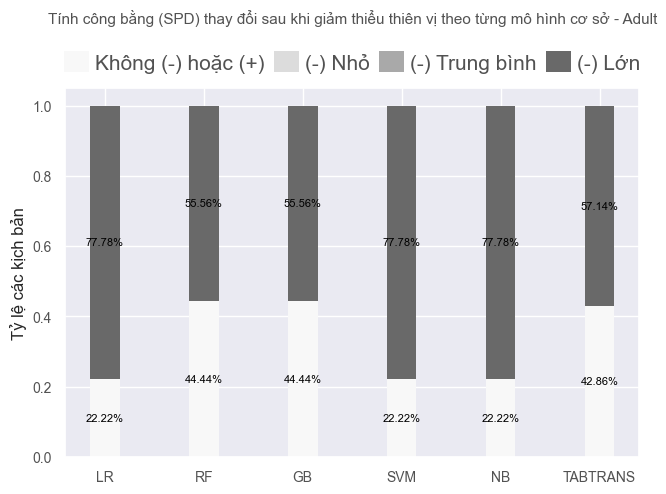

In [24]:
abs_avg_fairness_metrics = ['abs_'+ele for ele in avg_fairness_metrics]
diff_degree = behaviour_analysis(data=results_all_converted, metric_list=[FAIR_METRIC], category='base')
display(pd.DataFrame(diff_degree))
plot_behaviour_analysis(diff_degree, data_name, category='base', 
                        caption='Tính công bằng (%s) thay đổi sau khi giảm thiểu thiên vị theo từng mô hình cơ sở - {}'%(FAIR_METRIC.split('_')[2].upper()),
                        figsize=(8, 6))

## Accuracy vs. Fairness

### General Results

(slope > 0: trade-off)
We can see from the graphs below:

1. Overall trend: the higher the accuracy, the lower the group fairness (positive slope)
2. But the choice of metrics does matter:
    - group fairness: ford_score showcased no "trade-offs"
    - accuracy metrics: f1_score and roc_auc_score showed milder "trade-offs"
    - same fairness metric combined with different accuracy metrics can present both positive/negative relations, vice versa

In [25]:
import matplotlib.pyplot as plt

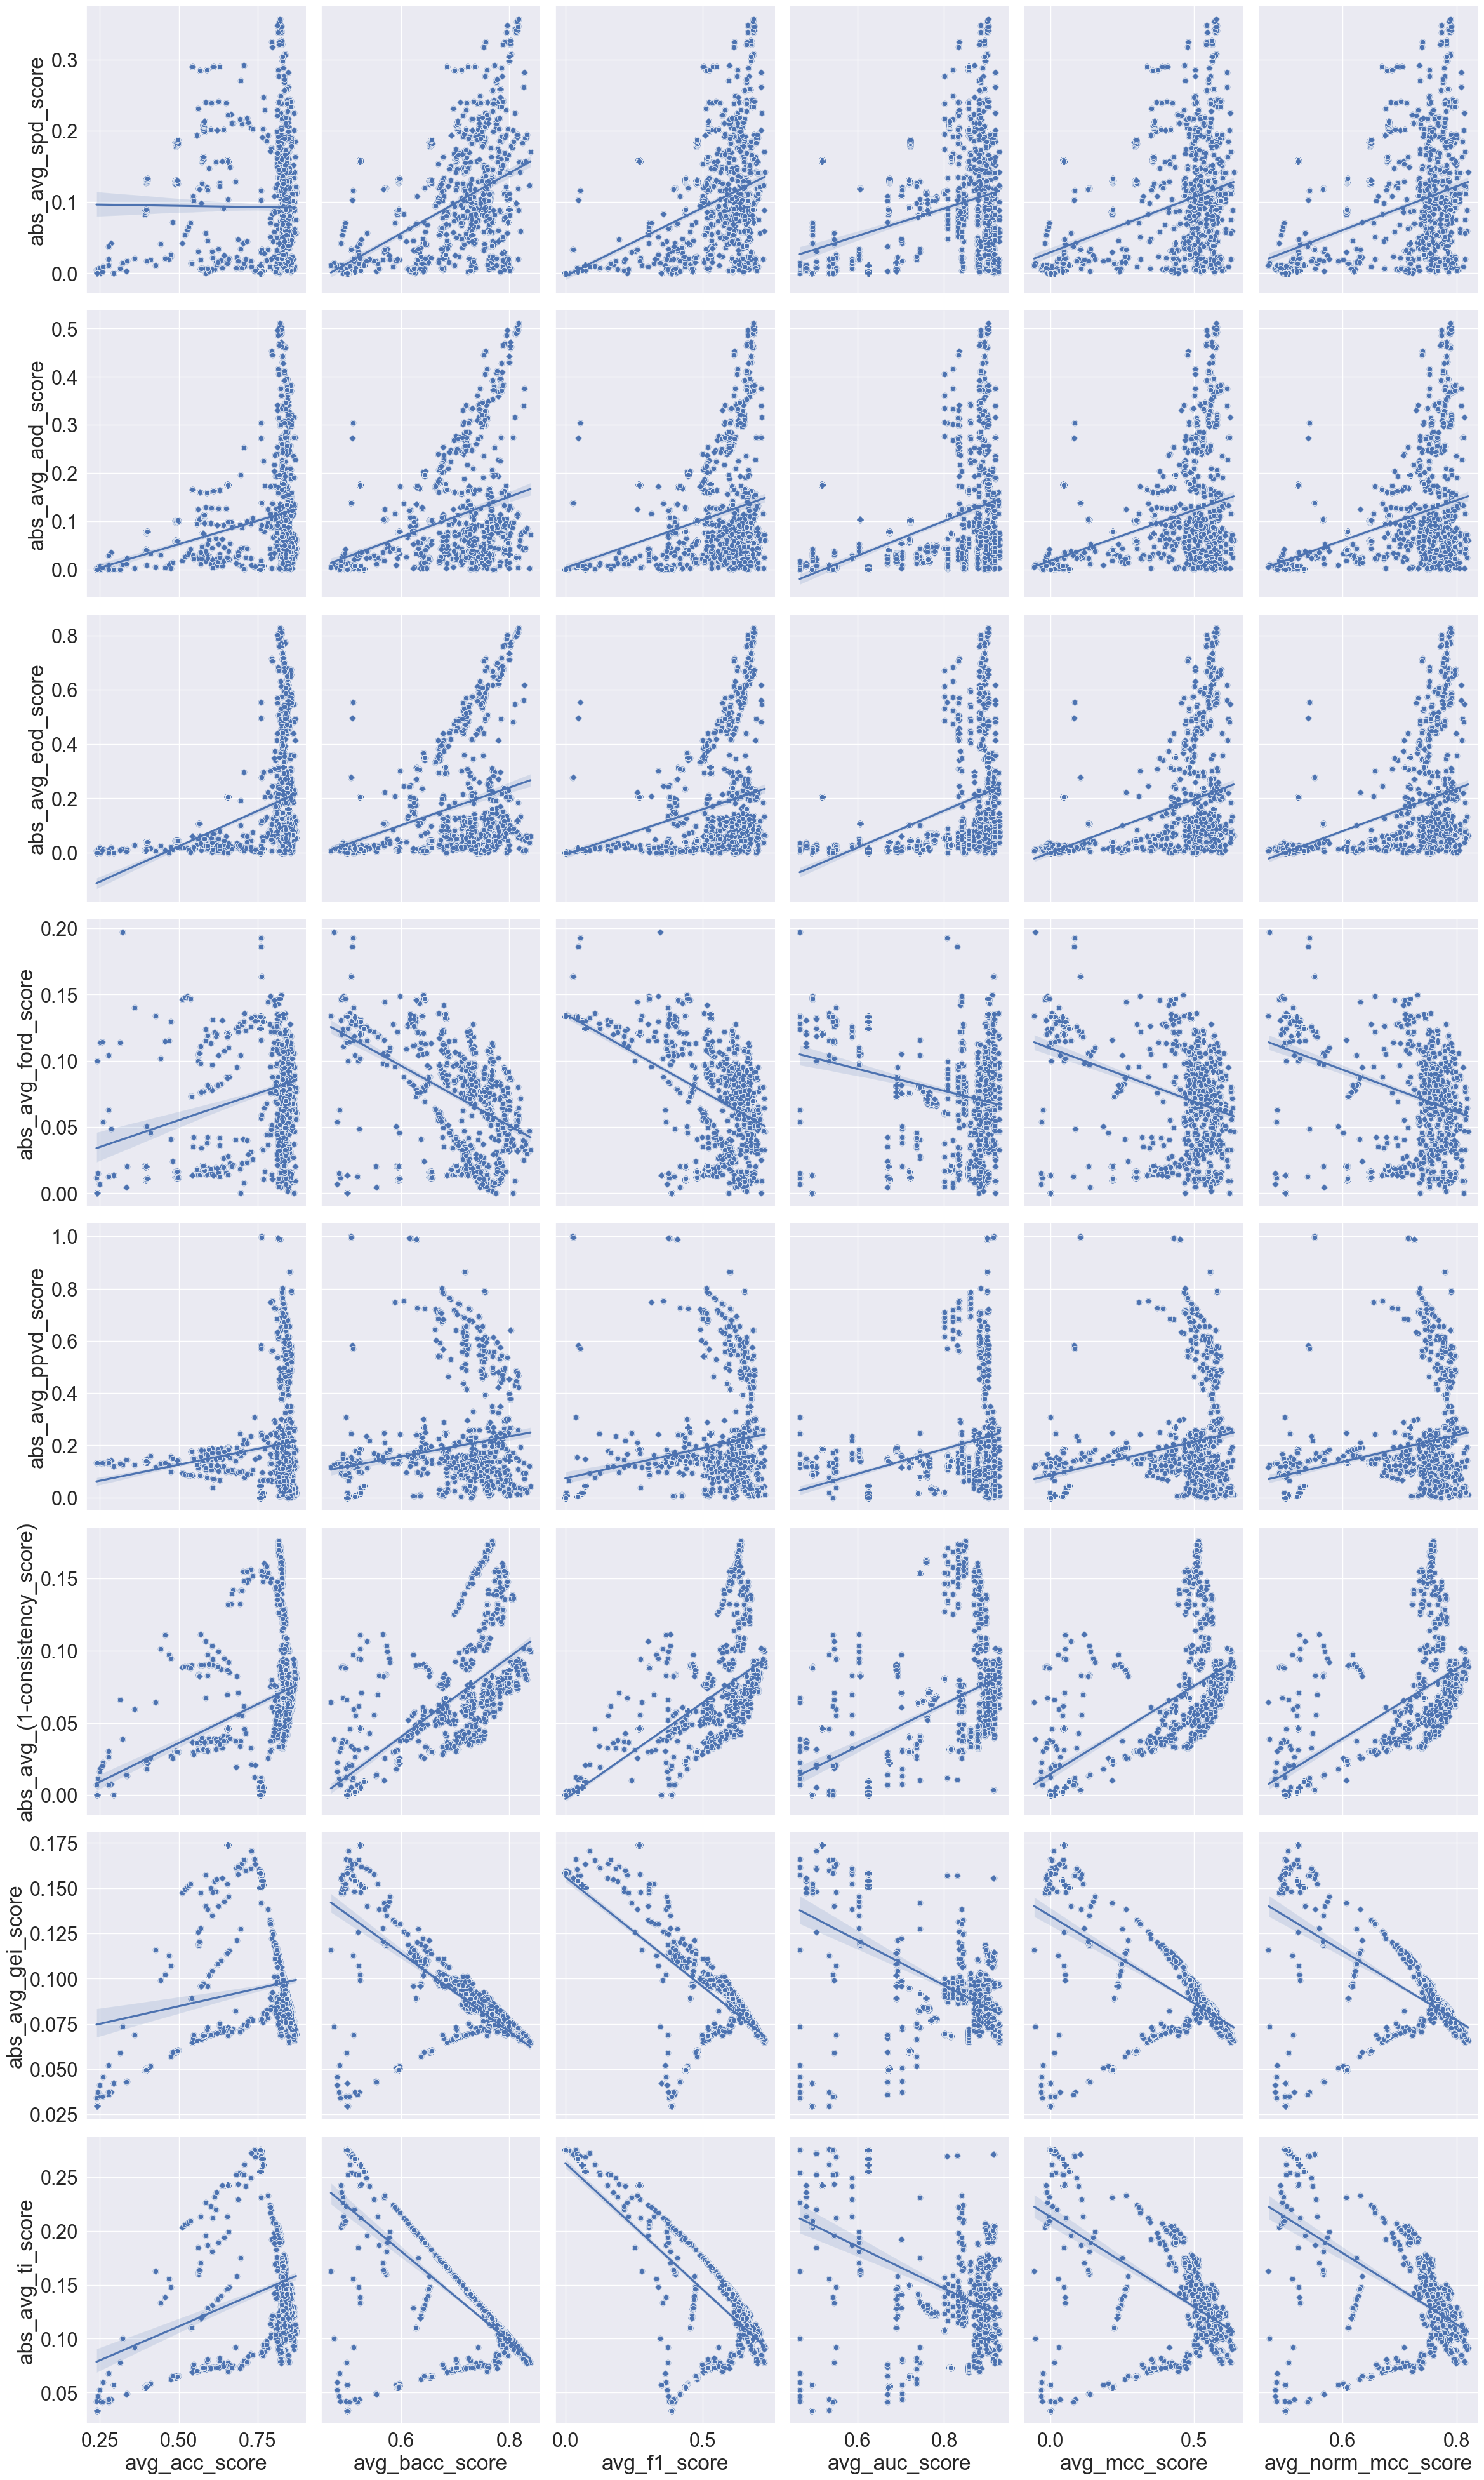

In [26]:
# Set plot font
plt.rcParams.update({'font.family':'serif'})
plt.rcParams.update({'font.serif':'Times New Roman'})

sns.set(font_scale = 2)
abs_fairness_metrics = ['abs_'+col for col in avg_fairness_metrics]
g = sns.pairplot(data=results_all_converted, x_vars=avg_accuracy_metrics, y_vars=abs_fairness_metrics,
             height=5, aspect=.8, kind="reg")
g.map(sns.scatterplot)

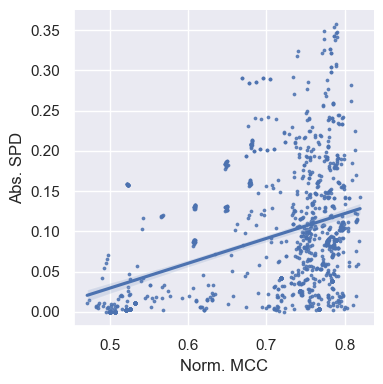

In [27]:
sns.set(font_scale = 1)
g = sns.lmplot(data=results_all_converted, x=ACC_METRIC, y=FAIR_METRIC, height=4, scatter_kws={'s':3})
# .fig.suptitle("Graph (a)")
ax = plt.gca()
ax.set(xlabel='Norm. MCC', ylabel='Abs. '+FAIR_METRIC.removeprefix('abs_').removeprefix('avg_').removesuffix('_score').upper())
# save plot
g.savefig('./Result_Plots/'+data_name+'_2D_general'+'.png', bbox_inches='tight')

### Base_estimator specific Results

We can see from the graphs below:
1. Different base_estimators can also generate very different results:
    - SVM (red) the least robust, while "NB" manifest clear trend
    - base_estimators divided into two groups when it comes to consistency_score: tree-based, ensemble (trade-offs) vs non tree-based, non ensemble

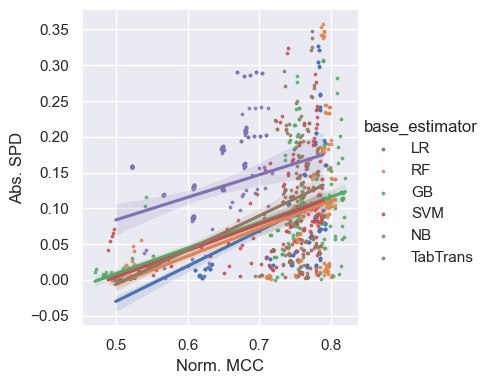

In [28]:
sns.set(font_scale = 1)
g = sns.lmplot(data=results_all_converted, x=ACC_METRIC, y=FAIR_METRIC, hue='base_estimator',
               hue_order = ['LR','RF','GB','SVM','NB','TabTrans'], height=4, scatter_kws={'s':3})
ax = plt.gca()
ax.set(xlabel='Norm. MCC', ylabel='Abs. '+FAIR_METRIC.removeprefix('abs_').removeprefix('avg_').removesuffix('_score').upper())
# save plot
g.savefig('./Result_Plots/'+data_name+'_2D_Base'+'.png', bbox_inches='tight')

### Threshold specific Results

We can see from the graphs below:

1. Using different threshold also yiels different results:
    - most obvious with (f1_score, group_fairness) combinations

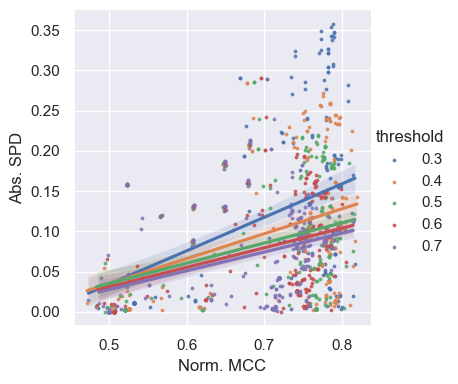

In [29]:
sns.set(font_scale = 1)
g = sns.lmplot(data=results_all_converted, x=ACC_METRIC, y=FAIR_METRIC, hue='threshold', height=4, scatter_kws={'s':3})
ax = plt.gca()
ax.set(xlabel='Norm. MCC', ylabel='Abs. '+FAIR_METRIC.removeprefix('abs_').removeprefix('avg_').removesuffix('_score').upper())
# save plot
g.savefig('./Result_Plots/'+data_name+'_2D_threshold'+'.png', bbox_inches='tight')

Consideration: put in Appendix?

In [30]:
# for threshold in sorted(results_all_converted.threshold.unique()):
#     sns.set(font_scale = 1)
#     g = sns.lmplot(data=results_all_converted[results_all_converted.threshold==threshold], x=ACC_METRIC, y=FAIR_METRIC, hue='threshold', height=4)
#     ax = plt.gca()
#     ax.set(xlabel='Norm. MCC', ylabel='Abs. '+FAIR_METRIC.removeprefix('abs_').removeprefix('avg_').removesuffix('_score').upper())
#     # save plot
#     g.savefig('./Result_Plots/'+data_name+'_2D_threshold'+'.png', bbox_inches='tight')

### Bias_mitigation specific Results

We can see from the graphs below:

1. Results are clearly divided into two groups
2. Generally with wide C.I.

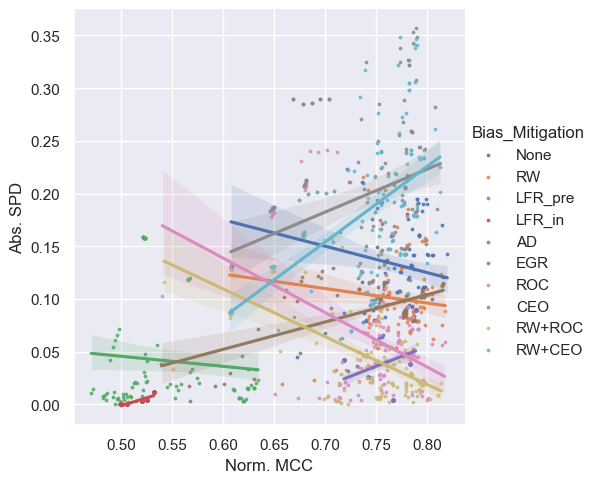

In [31]:
sns.set(font_scale = 1)
g = sns.lmplot(data=results_all_converted, x=ACC_METRIC, y=FAIR_METRIC, hue='Bias_Mitigation', 
               hue_order=['None','RW','LFR_pre','LFR_in','AD','EGR','ROC','CEO','RW+ROC','RW+CEO'],
               scatter_kws={'s': 3}, height=5)
ax = plt.gca()
ax.set(xlabel='Norm. MCC', ylabel='Abs. '+FAIR_METRIC.removeprefix('abs_').removeprefix('avg_').removesuffix('_score').upper())
# save plot
g.savefig('./Result_Plots/'+data_name+'_2D_BM'+'.png', bbox_inches='tight')

### Bias Mitigation Category

In [32]:
bm_category = {'PRE':['RW', 'LFR_pre'],
               'IN': ['LFR_in','AD','EGR'],
               'POST':['ROC','CEO'],
               'PRE+POST':['RW+ROC','RW+CEO']}

In [33]:
results_all_converted['BM_Category'] = results_all_converted['Bias_Mitigation'].replace({v: k for k, l in bm_category.items()\
                                                                                         for v in l})
results_all_converted[['Bias_Mitigation','BM_Category']].drop_duplicates()

,Bias_Mitigation,BM_Category
0,None,None
5,RW,PRE
10,LFR_pre,PRE
15,EGR,IN
20,ROC,POST
25,CEO,POST
30,RW+ROC,PRE+POST
35,RW+CEO,PRE+POST
175,LFR_in,IN
180,AD,IN


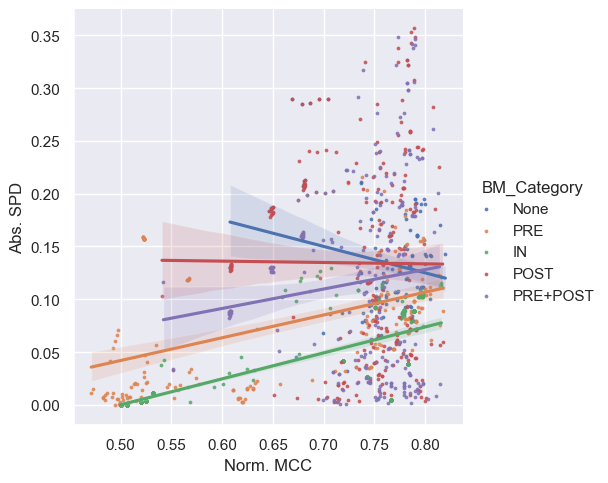

In [34]:
sns.set(font_scale = 1)
g = sns.lmplot(data=results_all_converted, x=ACC_METRIC, y=FAIR_METRIC, hue='BM_Category', 
               scatter_kws={'s': 3}, height=5)
ax = plt.gca()
ax.set(xlabel='Norm. MCC', ylabel='Abs. '+FAIR_METRIC.removeprefix('abs_').removeprefix('avg_').removesuffix('_score').upper())
# save plot
g.savefig('./Result_Plots/'+data_name+'_2D_BM_Category'+'.png', bbox_inches='tight')

## Heatmap

No clear trend between group and individual fairness with a few exceptions

In [35]:
# change column name so metrics name get more concise in the heatmaps
accuracy_map = [col.removeprefix('avg_').removesuffix('_score').upper() for col in avg_accuracy_metrics]
print(accuracy_map)
fairness_map = [col.removeprefix('abs_').removeprefix('avg_').removesuffix('_score').upper() for col in abs_avg_fairness_metrics]
fairness_map = ['1-CNS' if x=='(1-CONSISTENCY_SCORE)' else x for x in fairness_map]
print(fairness_map)

acc_rename = {avg_accuracy_metrics[i]:accuracy_map[i] for i in range(len(accuracy_map))}
fair_rename = {abs_avg_fairness_metrics[i]:fairness_map[i] for i in range(len(fairness_map))}
results_all_converted = results_all_converted.rename(columns=acc_rename).rename(columns=fair_rename)

['ACC', 'BACC', 'F1', 'AUC', 'MCC', 'NORM_MCC']
['SPD', 'AOD', 'EOD', 'FORD', 'PPVD', '1-CNS', 'GEI', 'TI']


### Original Metrics

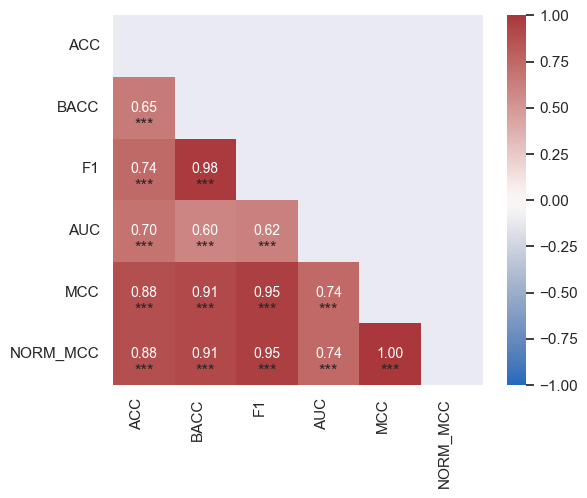

In [36]:
# original, spearman
g = corr_heatmap_with_significance(results_all_converted[accuracy_map], acc=True)
g.figure.savefig('./Heatmap/'+data_name+'_original_acc_corr'+'.png', bbox_inches='tight')
# corr_heatmap_with_significance(results_all_converted[accuracy_map+fairness_map])

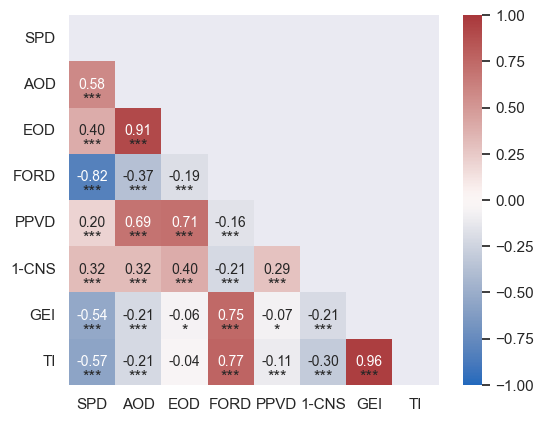

In [37]:
# original, spearman
g = corr_heatmap_with_significance(results_all_converted[fairness_map])
g.figure.savefig('./Heatmap/'+data_name+'_original_fair_corr'+'.png', bbox_inches='tight')
# corr_heatmap_with_significance(results_all_converted[accuracy_map+fairness_map])

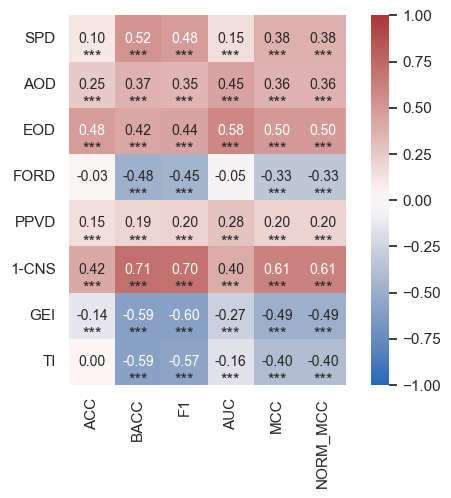

In [38]:
# original, spearman
g = corr_heatmap_with_significance_acc_fair(results_all_converted[accuracy_map+fairness_map])
g.figure.savefig('./Heatmap/'+data_name+'_original_acc_fair_corr'+'.png', bbox_inches='tight')

### Changes of Metrics

In [39]:
df_metric_diff = get_df_metric_diff(results_all_converted, metric_list=accuracy_map+fairness_map)
df_metric_diff

,dataset,base_estimator,Bias_Mitigation,ACC,BACC,F1,AUC,MCC,NORM_MCC,SPD,AOD,EOD,FORD,PPVD,1-CNS,GEI,TI
0,dataset,TabTrans,CEO,0.001916,-0.013874,-0.010580,-0.013287,-0.013741,-0.006871,0.143878,0.374404,0.677760,-0.003813,0.446961,0.005507,0.003822,0.008901
1,dataset,TabTrans,CEO,0.006093,0.002544,0.002831,0.003029,0.003919,0.001960,-0.011936,-0.009345,-0.004849,0.000697,0.007337,0.009757,0.000651,0.000884
2,dataset,TabTrans,CEO,-0.003918,-0.010500,-0.011580,-0.012753,-0.015757,-0.007879,0.162747,0.398310,0.709453,-0.000271,0.484847,0.009538,0.003180,0.005711
3,dataset,TabTrans,CEO,-0.003983,-0.001919,-0.002759,-0.000148,-0.003336,-0.001668,0.060941,0.108530,0.172082,-0.022681,0.075694,-0.000120,-0.000103,-0.000207
4,dataset,TabTrans,CEO,-0.001077,-0.015142,-0.015949,-0.013287,-0.015116,-0.007558,0.105445,0.299986,0.554751,-0.041350,0.485948,0.002420,0.003670,0.008830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,dataset,TabTrans,AD,0.002992,-0.073456,-0.101660,0.021707,-0.037485,-0.018742,-0.111215,0.093387,0.210935,0.074434,0.185995,-0.052546,0.011551,0.042378
16,dataset,TabTrans,AD,-0.011368,-0.037877,-0.080921,0.006772,-0.044035,-0.022018,-0.038437,0.134625,0.249721,0.061188,0.244532,-0.018344,0.009414,0.021412
17,dataset,TabTrans,AD,-0.003057,-0.073765,-0.116969,0.034280,-0.035033,-0.017516,-0.074699,0.117107,0.245270,0.074433,0.233437,-0.042527,0.011493,0.041593
18,dataset,TabTrans,AD,-0.009732,-0.032612,-0.070446,0.005810,-0.037749,-0.018874,-0.036382,0.135844,0.251768,0.059529,0.257358,-0.016066,0.008076,0.018451


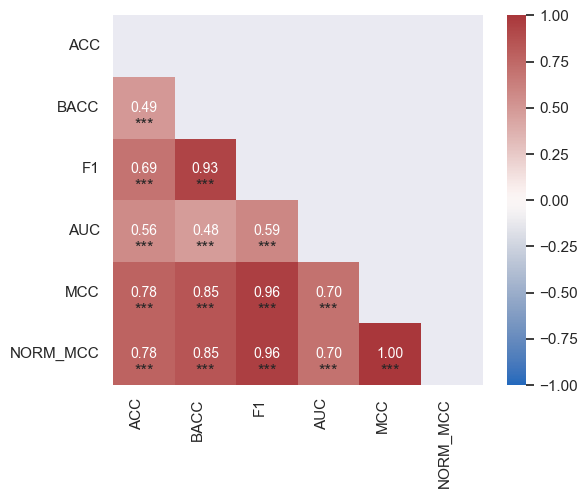

In [40]:
# change, spearman
g = corr_heatmap_with_significance(df_metric_diff[accuracy_map], acc=True)
g.figure.savefig('./Heatmap/'+data_name+'_change_acc_corr'+'.png', bbox_inches='tight')
# corr_heatmap_with_significance(results_all_converted[accuracy_map+fairness_map])

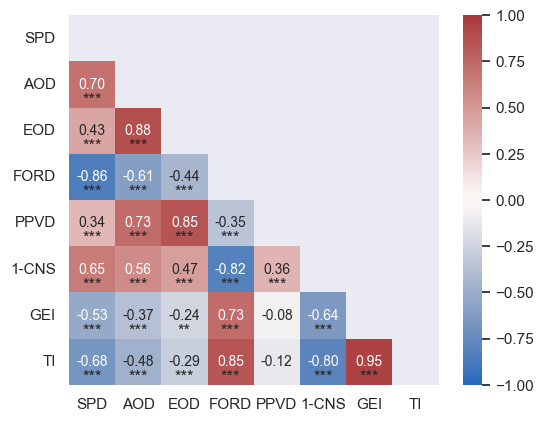

In [41]:
# change, spearman
g = corr_heatmap_with_significance(df_metric_diff[fairness_map])
g.figure.savefig('./Heatmap/'+data_name+'_change_fair_corr'+'.png', bbox_inches='tight')
# corr_heatmap_with_significance(results_all_converted[accuracy_map+fairness_map])